In [80]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [81]:
df = pd.read_csv("spambase.csv")

df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt



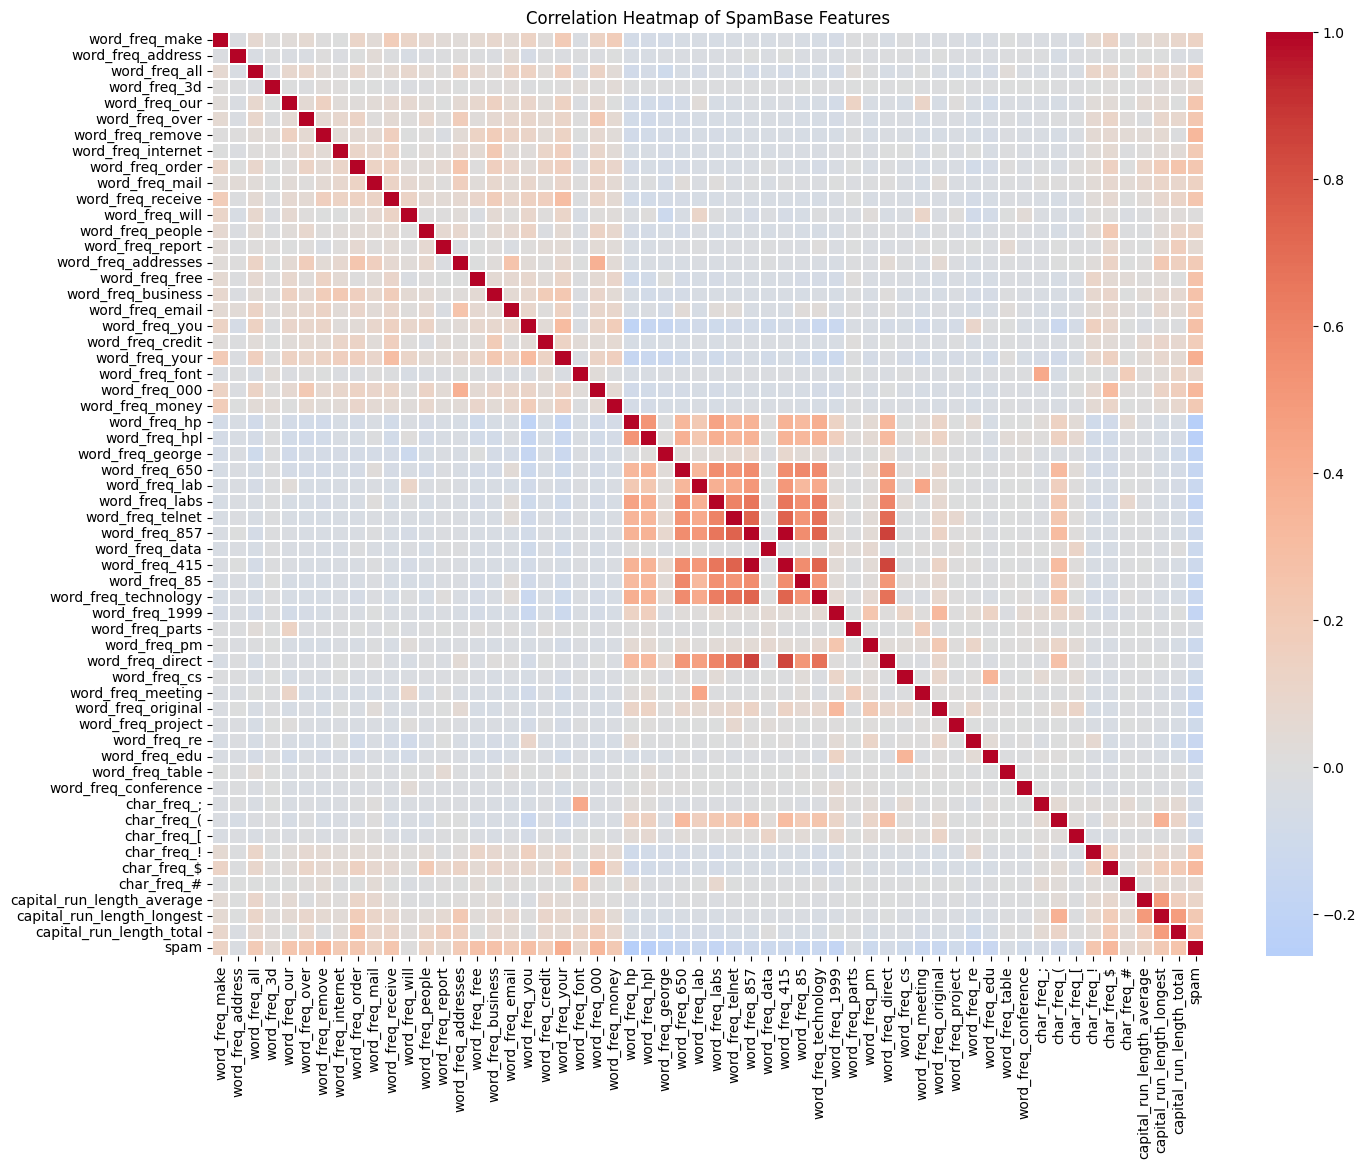

In [83]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.2
)
plt.title("Correlation Heatmap of SpamBase Features")
plt.show()


In [84]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [87]:
y_pred = model.predict(X_test_scaled)


In [88]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")


Accuracy: 92.94245385450597 %


In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[530  28]
 [ 37 326]]


In [90]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



In [91]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [93]:
X_vif = add_constant(X)


In [94]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data


,Feature,VIF
0,const,5.734524
1,word_freq_make,1.135153
2,word_freq_address,1.034308
3,word_freq_all,1.110868
4,word_freq_3d,1.007701
5,word_freq_our,1.120328
6,word_freq_over,1.099838
7,word_freq_remove,1.124583
8,word_freq_internet,1.098624
9,word_freq_order,1.206708


In [95]:
# Drop features with VIF > 10 (example threshold)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]

# Avoid dropping the constant
high_vif_features = high_vif_features[high_vif_features != "const"]

print(high_vif_features)


32    word_freq_857
34    word_freq_415
Name: Feature, dtype: object


In [96]:
X_reduced = X.drop(columns=high_vif_features)


In [97]:
X_vif_reduced = add_constant(X_reduced)

vif_reduced = pd.DataFrame()
vif_reduced["Feature"] = X_vif_reduced.columns
vif_reduced["VIF"] = [
    variance_inflation_factor(X_vif_reduced.values, i)
    for i in range(X_vif_reduced.shape[1])
]

vif_reduced


,Feature,VIF
0,const,5.651806
1,word_freq_make,1.131366
2,word_freq_address,1.030810
3,word_freq_all,1.110639
4,word_freq_3d,1.007625
5,word_freq_our,1.118428
6,word_freq_over,1.098866
7,word_freq_remove,1.123969
8,word_freq_internet,1.098485
9,word_freq_order,1.205745


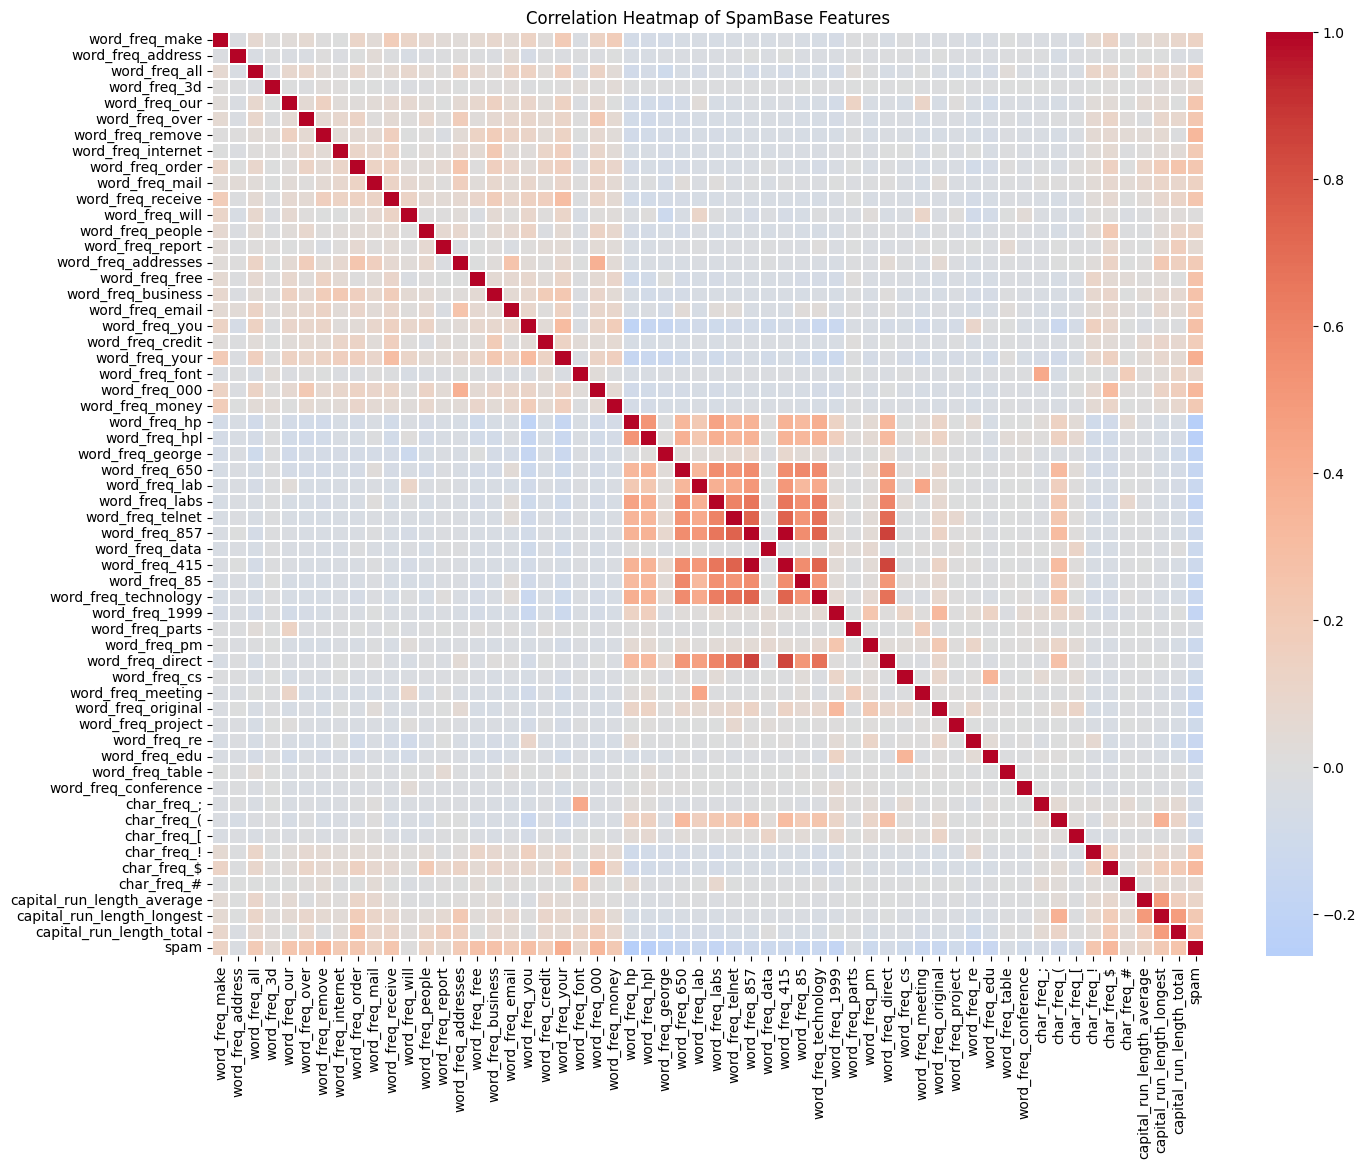

In [98]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.2
)
plt.title("Correlation Heatmap of SpamBase Features")
plt.show()


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [100]:
y_pred = model.predict(X_test_scaled)


In [101]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")


Accuracy: 92.94245385450597 %


In [102]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[530  28]
 [ 37 326]]


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921

